In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from nltk.corpus import stopwords
nltk.download('stopwords')
from CleanData import clean_comment, get_bag_of_words
import datetime

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to /home/zchao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load all article reviews from MediaBiasChart V5.0:
media_bias = pd.read_csv('../data/MediaBiasChart.csv')
media_bias = media_bias.groupby('Source').mean()
media_bias.reset_index(level=0, inplace=True)
media_bias

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,Al Jazeera,-3.705333,46.700000
3,Alternet,-19.156250,26.385000
4,"American Spectator, The",21.767778,23.481111
...,...,...,...
103,Washington Times,12.966667,37.228000
104,Weather.com,-2.434000,51.300000
105,Wonkette,-27.716154,17.336923
106,World Truth TV,8.480769,15.262308


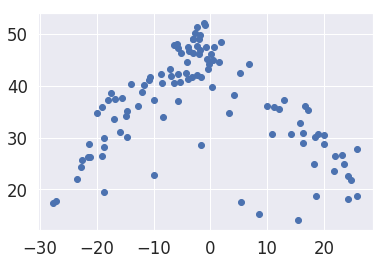

In [3]:
plt.scatter(media_bias['Bias'].to_numpy(),media_bias['Quality'].to_numpy())

[]

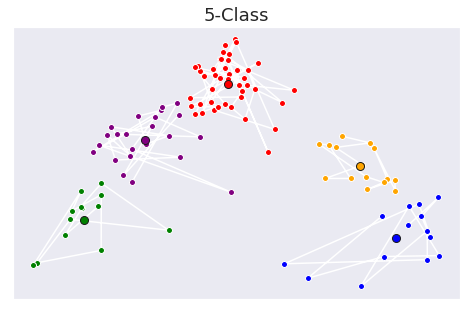

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
centers = [[-20, 20], [-10, 35], [0, 50], [10, 35], [20, 20]]
n_clusters = len(centers)
X = media_bias[['Bias','Quality']].to_numpy()
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10)
k_means.fit(X)

colors = ['red', 'orange', 'green','blue','purple']
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=12)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=8)
ax.set_title('5-Class')
ax.set_xticks(())
ax.set_yticks(())

## A hand-make dictionary mapping each media in MediaBiasChart_to_Tweet to their twitter account name
## The full list of media twitter account is from news_outlet_tweet_IDs
## at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/2FIFLH

In [5]:
MediaBiasChart_to_Tweet = {'ABC':'ABC','AP':'AP','Axios':'axios','CNN':'CNN','Wall Street Journal':'WSJ',\
    'The Atlantic':'TheAtlantic','The Hill':'thehill', 'BBC':'BBC', 'Think Progress':'thinkprogress',\
    'MSNBC':'MSNBC','The Nation':'thenation','Daily Beast':'thedailybeast','Mother Jones':'MotherJones',\
    'CNSNews':'cnsnews','Fox News':'FoxNews', 'The Federalist':'FDRLST','Breitbart':'BreitbartNews',\
    'Daily Caller':'DailyCaller','The Blaze':'theblaze','Business Insider':'businessinsider',\
    'CBS':'CBSNews','The Economist':'TheEconomist','BuzzFeed':'BuzzFeed','Daily Signal':'DailySignal',\
    'New Republic':'newrepublic','Foreign Policy':'ForeignPolicy','IJR':'TheIJR','National Review':'NRO',\
    'National Public Radio':'NPR','New York Post':'nypost','New York Times':'nytimes','The New Yorker':'NewYorker',\
    'NewsMax':'newsmax','One America News Network':'OANN','Politico':'politico','Quartz':'qz',\
    'Reason':'reason','Reuters':'Reuters','Slate':'Slate','Talking Points Memo':'TPM','Vanity Fair':'VanityFair',\
    'Vox':'voxdotcom','Washington Examiner':'dcexaminer','Washington Free Beacon':'FreeBeacon',\
    'Washington Post':'washingtonpost','Washington Times':'WashTimes','The Week':'TheWeek','Bloomberg':'Bloomberg',\
    'Christian Science Monitor':'csmonitor', 'Democracy Now':'democracynow','Financial Times':'FT',\
    'Fiscal Times':'TheFiscalTimes','Forbes':'Forbes','Fortune':'FortuneMagazine','Forward':'jdforward',\
    'FreeSpeech TV':'freespeechtv','Huffington Post':'HuffPost','LA Times':'latimes','Marketwatch':'MarketWatch',\
    'OZY':'ozy','PBS':'PBS','ProPublica':'ProPublica','Time':'TIME','USA Today':'USATODAY',\
    'Weather.com':'weatherchannel'}

media_bias.Source.map(MediaBiasChart_to_Tweet)

0                 ABC
1                  AP
2                 NaN
3                 NaN
4                 NaN
            ...      
103         WashTimes
104    weatherchannel
105               NaN
106               NaN
107               NaN
Name: Source, Length: 108, dtype: object

In [6]:
media_bias['Source'] = media_bias.Source.map(MediaBiasChart_to_Tweet)
media_bias = media_bias.dropna()
media_bias.reset_index(drop=True)

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,axios,-5.737857,47.303571
3,BBC,-3.033333,46.266667
4,Bloomberg,-0.850345,47.522759
...,...,...,...
60,dcexaminer,12.166250,35.485000
61,FreeBeacon,16.708125,36.187500
62,washingtonpost,-4.179888,44.567303
63,WashTimes,12.966667,37.228000


In [7]:
df1 = pd.read_csv('../data/filtered_part1.csv')
df2 = pd.read_csv('../data/filtered_part2.csv')
df3 = pd.read_csv('../data/filtered_part3.csv')
df4 = pd.read_csv('../data/filtered_part4.csv',lineterminator='\n')
df6 = pd.read_csv('../data/filtered_part6.csv')
df7 = pd.read_csv('../data/filtered_part7.csv')
df8 = pd.read_csv('../data/filtered_part8.csv')
df = pd.concat([df1, df2, df3, df4, df6, df7, df8], sort = False)
df.shape

(1435714, 4)

In [8]:
# Most of the medias has a fairly good amount of Tweets to be analyzed
pd.set_option('display.max_rows', None)
df.groupby(df['user_screen_name']).size()

user_screen_name
>>>>>>> 2a22a3c4837c9c13bbdf5cd86a0e11a26c1a680c                                   1
ABC                                                                            39552
AP                                                                             35117
BBC                                                                             5660
Bloomberg                                                                        127
BreitbartNews                                                                   9364
BuzzFeed                                                                       16283
CBSNews                                                                        39148
CNN                                                                            68206
DailyCaller                                                                    25946
DailySignal                                                                     7796
Err:510                                         

In [9]:
all_media = media_bias['Source'].tolist()
df = df.loc[df['user_screen_name'].isin(all_media)]
df.shape

(1417030, 4)

In [10]:
df.head(5)

,user_screen_name,text,created_at,hashtags
0,ABC,Fidel Castro Dead at 90: Barbara Walters talks...,2016-11-26 11:00:10+00:00,NaN
1,ABC,Fidel Castro Dead at 90: Miami's Little Havana...,2016-11-26 10:11:27+00:00,NaN
2,ABC,World leaders from Justin Trudeau to Vladimir ...,2016-11-26 15:08:55+00:00,NaN
3,ABC,World leaders and public figures react to form...,2016-11-26 07:52:34+00:00,NaN
4,ABC,Fidel Castro's funeral set for December 4 foll...,2016-11-26 15:43:39+00:00,NaN


In [11]:
print(all_media)
print(k_means_labels)

['ABC', 'AP', 'axios', 'BBC', 'Bloomberg', 'BreitbartNews', 'businessinsider', 'BuzzFeed', 'CBSNews', 'CNN', 'cnsnews', 'csmonitor', 'thedailybeast', 'DailyCaller', 'DailySignal', 'democracynow', 'FT', 'TheFiscalTimes', 'Forbes', 'ForeignPolicy', 'FortuneMagazine', 'jdforward', 'FoxNews', 'freespeechtv', 'HuffPost', 'TheIJR', 'latimes', 'MSNBC', 'MarketWatch', 'MotherJones', 'NPR', 'NRO', 'newrepublic', 'nypost', 'nytimes', 'newsmax', 'ozy', 'OANN', 'PBS', 'politico', 'ProPublica', 'qz', 'reason', 'Reuters', 'Slate', 'TPM', 'TheAtlantic', 'theblaze', 'TheEconomist', 'FDRLST', 'thehill', 'thenation', 'NewYorker', 'TheWeek', 'thinkprogress', 'TIME', 'USATODAY', 'VanityFair', 'voxdotcom', 'WSJ', 'dcexaminer', 'FreeBeacon', 'washingtonpost', 'WashTimes', 'weatherchannel']
[0 0 0 2 3 0 0 2 0 1 0 0 0 4 3 0 3 1 4 2 4 1 2 0 1 1 4 0 0 0 0 0 0 4 1 2 2
 4 0 3 4 4 0 3 4 0 4 3 0 1 4 0 0 4 1 3 0 0 2 1 0 1 2 2 0 0 4 0 0 3 0 2 2 4
 3 0 4 1 0 1 0 3 3 0 0 4 0 0 4 4 0 2 3 0 4 4 4 4 0 1 1 4 0 1 0 2 3 3]


In [12]:
k_means_labels = k_means_labels.tolist()
dic = {} 
for key in all_media: 
    for value in k_means_labels: 
        dic[key] = value 
        k_means_labels.remove(value) 
        break  
  

In [13]:
dic

{'ABC': 0,
 'AP': 0,
 'axios': 0,
 'BBC': 2,
 'Bloomberg': 3,
 'BreitbartNews': 0,
 'businessinsider': 0,
 'BuzzFeed': 2,
 'CBSNews': 0,
 'CNN': 1,
 'cnsnews': 0,
 'csmonitor': 0,
 'thedailybeast': 0,
 'DailyCaller': 4,
 'DailySignal': 3,
 'democracynow': 0,
 'FT': 3,
 'TheFiscalTimes': 1,
 'Forbes': 4,
 'ForeignPolicy': 2,
 'FortuneMagazine': 4,
 'jdforward': 1,
 'FoxNews': 2,
 'freespeechtv': 0,
 'HuffPost': 1,
 'TheIJR': 1,
 'latimes': 4,
 'MSNBC': 0,
 'MarketWatch': 0,
 'MotherJones': 0,
 'NPR': 0,
 'NRO': 0,
 'newrepublic': 0,
 'nypost': 4,
 'nytimes': 1,
 'newsmax': 2,
 'ozy': 2,
 'OANN': 4,
 'PBS': 0,
 'politico': 3,
 'ProPublica': 4,
 'qz': 4,
 'reason': 0,
 'Reuters': 3,
 'Slate': 4,
 'TPM': 0,
 'TheAtlantic': 4,
 'theblaze': 3,
 'TheEconomist': 0,
 'FDRLST': 1,
 'thehill': 4,
 'thenation': 0,
 'NewYorker': 0,
 'TheWeek': 4,
 'thinkprogress': 1,
 'TIME': 3,
 'USATODAY': 0,
 'VanityFair': 0,
 'voxdotcom': 2,
 'WSJ': 1,
 'dcexaminer': 0,
 'FreeBeacon': 1,
 'washingtonpost': 2,
 

In [14]:
X = df['text']
y = df['user_screen_name'].map(dic)

In [15]:
X.shape, y.shape

((1417030,), (1417030,))

In [16]:
# Randomly shuffle the train/test data
import random
Xy = list(zip(X, y))
random.shuffle(Xy)
X, y = zip(*Xy)

In [17]:
nTrain = int(0.8*len(X))
X_train = X[:nTrain]
X_test = X[nTrain:]
y_train = y[:nTrain]
y_test = y[nTrain:]

In [18]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.52      0.76      0.62     53808
          1       0.71      0.52      0.60     43565
          2       0.80      0.50      0.62     39715
          3       0.63      0.40      0.49     45960
          4       0.61      0.72      0.66    100358

avg / total       0.64      0.62      0.61    283406



In [18]:
def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):
    node = 128
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(node, input_shape=(shape,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(node, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(node, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(nClasses, activation=tf.nn.softmax)
    ])

 
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    
    model.compile(loss=loss_object,
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_x = TfidfVectorizer(max_features=6000)
X_train_tfidf = vectorizer_x.fit_transform(X_train[:20000]).toarray()
X_test_tfidf = vectorizer_x.transform(X_test[:5000]).toarray()
print("tf-idf with",str(np.array(X_train_tfidf).shape[1]),"features")


model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 20)
model_DNN.summary()

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tf-idf with 6000 features
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768128    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2580      
Total params: 787,220
Trainable params: 787,220
Non-trainable params: 0
_________________________________________________________________


In [20]:
y_train = np.array(y_train[:20000])
y_test = np.array(y_test[:5000])

model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              epochs=10,
                              batch_size=128,
                              verbose=2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 - 2s - loss: 2.7817 - accuracy: 0.3456 - val_loss: 2.7182 - val_accuracy: 0.3600
Epoch 2/20
20000/20000 - 1s - loss: 2.7229 - accuracy: 0.3553 - val_loss: 2.7181 - val_accuracy: 0.3600
Epoch 3/20
20000/20000 - 1s - loss: 2.7226 - accuracy: 0.3553 - val_loss: 2.7179 - val_accuracy: 0.3600
Epoch 4/20
20000/20000 - 1s - loss: 2.7125 - accuracy: 0.3632 - val_loss: 2.6954 - val_accuracy: 0.3890
Epoch 5/20
20000/20000 - 1s - loss: 2.6489 - accuracy: 0.4373 - val_loss: 2.6682 - val_accuracy: 0.4116
Epoch 6/20
20000/20000 - 1s - loss: 2.5845 - accuracy: 0.5013 - val_loss: 2.6627 - val_accuracy: 0.4172
Epoch 7/20
20000/20000 - 1s - loss: 2.5470 - accuracy: 0.5378 - val_loss: 2.6638 - val_accuracy: 0.4146
Epoch 8/20
20000/20000 - 1s - loss: 2.5235 - accuracy: 0.5606 - val_loss: 2.6664 - val_accuracy: 0.4128
Epoch 9/20
20000/20000 - 1s - loss: 2.5005 - accuracy: 0.5842 - val_loss: 2.6617 - val_accuracy: 0.4202
Epoch 10/20
200

In [22]:
from sklearn import metrics
predicted = model_DNN.predict_classes(X_test_tfidf)

print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.46      0.62      0.53      1800
          1       0.21      0.21      0.21       805
          2       0.47      0.32      0.38       691
          3       0.52      0.36      0.43       759
          4       0.41      0.35      0.38       945

avg / total       0.42      0.42      0.41      5000

